# Analysis of listings

The notebook consists of 
- **Data cleaning steps**, 
- **Creating a Correlation Matrix**,
- **Building a Regression and Decision Tree model**,
- **Visualizing the Regression Model and the Word Cloud**.
- The notebook also contains **Future directions** that are crucial to improve the performance of the pricing model.

In [169]:
! pip install monthdelta wordcloud
# older version of scipy had a bug, I had to upgrade it
#! pip install scipy --upgrade

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Data cleaning and preparations

In [3]:
listings = pd.read_csv('./listings.csv', sep=',', index_col='id')
print(type(listings))
listings.head(5)

<class 'pandas.core.frame.DataFrame'>


,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2818,https://www.airbnb.com/rooms/2818,20180807130159,2018-08-07,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi (up t...,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi (up t...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",NaN,...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.08
3209,https://www.airbnb.com/rooms/3209,20180807130159,2018-08-07,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,NaN,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.09
20168,https://www.airbnb.com/rooms/20168,20180807130159,2018-08-07,100%Centre-Private Floor/Bathroom-Lockable Studio,"Cozy, very private and on your own private flo...",For those who like all facets of city life. In...,"Cozy, very private and on your own private flo...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm Checkout anyt...,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.09
25428,https://www.airbnb.com/rooms/25428,20180807130159,2018-08-07,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.15
27886,https://www.airbnb.com/rooms/27886,20180807130159,2018-08-07,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,1.92


In [4]:
listings.describe()

,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,2.011400e+04,0.0,0.0,0.0,2.011400e+04,0.0,20109.000000,20109.000000,0.0,20114.000000,...,17401.000000,17385.000000,17389.000000,17371.000000,17385.000000,17372.000000,17371.000000,0.0,20114.000000,17669.000000
mean,2.018081e+13,NaN,NaN,NaN,4.583641e+07,NaN,6.188721,6.188721,NaN,52.365237,...,94.593702,9.652459,9.441601,9.705486,9.749152,9.387347,9.166887,NaN,5.113851,1.100457
std,6.250155e-02,NaN,NaN,NaN,5.130979e+07,NaN,25.152015,25.152015,NaN,0.015951,...,6.923745,0.717771,0.897237,0.697279,0.661418,0.751126,0.825235,NaN,20.281751,1.345307
min,2.018081e+13,NaN,NaN,NaN,3.159000e+03,NaN,0.000000,0.000000,NaN,52.289274,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,2.018081e+13,NaN,NaN,NaN,7.945941e+06,NaN,1.000000,1.000000,NaN,52.355120,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.280000
50%,2.018081e+13,NaN,NaN,NaN,2.312281e+07,NaN,1.000000,1.000000,NaN,52.364579,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.650000
75%,2.018081e+13,NaN,NaN,NaN,6.708549e+07,NaN,1.000000,1.000000,NaN,52.375014,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.290000
max,2.018081e+13,NaN,NaN,NaN,2.079775e+08,NaN,629.000000,629.000000,NaN,52.428882,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,162.000000,12.000000


Drop those columns that don't have any value in them

In [5]:
listings=listings.dropna(axis='columns', how='all')

In [6]:
listings=pd.DataFrame(listings)

In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20114 entries, 2818 to 27565537
Data columns (total 89 columns):
listing_url                         20114 non-null object
scrape_id                           20114 non-null int64
last_scraped                        20114 non-null object
name                                20075 non-null object
summary                             19590 non-null object
space                               14738 non-null object
description                         20006 non-null object
experiences_offered                 20114 non-null object
neighborhood_overview               13375 non-null object
notes                               9133 non-null object
transit                             13506 non-null object
access                              12469 non-null object
interaction                         12134 non-null object
house_rules                         12533 non-null object
picture_url                         20114 non-null object
host_id          

### Create dummies from weeakly and monthly prices

These variables have many missings. When they have a value that supposedly means that the host set up a discount for a weekly or a monthly booking. That is why I decided to keep them as binary variables.

In [8]:
listings['weekly_price'].sort_values().head()

id
6282757    $1,000.00
4065532    $1,000.00
6553928    $1,000.00
5560161    $1,000.00
2485539    $1,000.00
Name: weekly_price, dtype: object

In [9]:
listings['monthly_price'].sort_values().head()

id
4556106    $1,000.00
5951601    $1,000.00
8435418    $1,000.00
5388929    $1,000.00
6109568    $1,000.00
Name: monthly_price, dtype: object

In [10]:
listings['is_weekly_price'] = np.where(pd.notna(listings['weekly_price']), 1 , 0).astype('bool')

In [11]:
listings['is_weekly_price'].value_counts()

False    17067
True      3047
Name: is_weekly_price, dtype: int64

In [12]:
listings['is_monthly_price'] = np.where(pd.notna(listings['monthly_price']), 1 , 0).astype('bool')
listings['is_monthly_price'].value_counts()

False    18431
True      1683
Name: is_monthly_price, dtype: int64

### Deleting  columns

Deleting columns that do not have information relevant to our analysis. Some of them were ids, urls or contained many missing values. Neighbourhood appears in several different forms, so I only kept the 'neighbourhood_clean' variable.

In [13]:
listings=listings.drop(['name','scrape_id','listing_url','notes','square_feet','weekly_price','monthly_price','host_id','picture_url','host_url','host_thumbnail_url','host_picture_url','neighbourhood','host_neighbourhood'], axis=1)

## Recoding date variables

In [14]:
import datetime

In [15]:
listings['first_review'].head()

id
2818     2009-03-30
3209     2015-07-31
20168    2010-03-02
25428    2018-01-21
27886    2012-01-09
Name: first_review, dtype: object

In [16]:
listings['first_review'].describe()

count          17669
unique          1988
top       2016-03-30
freq              86
Name: first_review, dtype: object

In [17]:
listings['first_review'] = pd.to_datetime(listings['first_review'])

In [18]:
# to see the seasonality, we will create a variable with only the month in it
listings['first_review_month']=listings['first_review'].apply(lambda x: x.month)

In [19]:
listings['last_review'] = pd.to_datetime(listings['last_review'])

In [20]:
listings['last_review_month']=listings['last_review'].apply(lambda x: x.month)

Today's value was gathered from the 'last_scrape' variable

In [21]:
today = datetime.datetime(2018,8,7)

In [22]:
listings['host_since']=today-pd.to_datetime(listings['host_since'])

In [23]:
listings['host_since'].head()

id
2818    3604 days
3209    3574 days
20168   3170 days
25428   3182 days
27886   3059 days
Name: host_since, dtype: timedelta64[ns]

In [24]:
#listings.info()

In [25]:
cal_updates=listings['calendar_updated'].value_counts().index.tolist()

In [26]:
cal_updates[1:10]

['a week ago',
 '2 weeks ago',
 '3 weeks ago',
 '2 months ago',
 '3 months ago',
 '4 weeks ago',
 'yesterday',
 '4 months ago',
 '5 weeks ago']

Transforming 'cal_updates' variable into a time delta variable

In [27]:
listings['calendar_updated']=listings['calendar_updated'].str.replace('a ','1 ')

In [28]:
import monthdelta

In [29]:
def time_ago(string):
    today = datetime.datetime(2018,8,7)
    var= None
    if "week" in string :
        elements= string.split(" ")
        var =  today - datetime.timedelta(days=7*int(elements[0]))   
    if "month" in string:
        elements= string.split(" ")
        var= today-monthdelta.monthdelta(int(elements[0]))
    if "today" in string:
        var= today
    if "yesterday" in string:
        var= today - datetime.timedelta(days=1)
    if "never" in string:
        var = None
    return var

In [30]:
listings['calendar_updated']=today-listings['calendar_updated'].apply(lambda x: time_ago(x))

In [31]:
listings['calendar_updated'].head()

id
2818    0 days
3209    7 days
20168   0 days
25428   1 days
27886   0 days
Name: calendar_updated, dtype: timedelta64[ns]

Because of the correlation matrix and the regression, all time variables will be recoded as numbers

In [32]:
# Handling time deltas
listings['calendar_updated']=listings['calendar_updated'].dt.days
listings['host_since']=listings['host_since'].dt.days

In [33]:
# Handling date vars
listings['first_review']= (listings['first_review']-today).dt.total_seconds().astype('float')

In [34]:
listings['last_review']= (listings['last_review']-today).dt.total_seconds().astype('float')

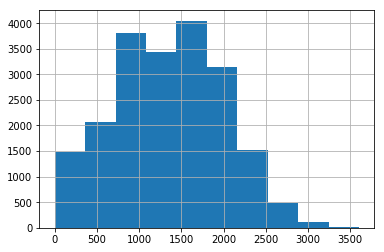

In [35]:
listings['host_since'].hist()

In [36]:
listings.describe()

,host_since,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,first_review_month,last_review_month
count,20109.000000,20109.000000,20109.000000,20114.000000,20114.000000,20114.000000,20105.000000,20107.000000,20108.000000,20114.000000,...,17385.000000,17389.000000,17371.000000,17385.000000,17372.000000,17371.000000,20114.000000,17669.000000,17669.000000,17671.000000
mean,1333.014571,6.188721,6.188721,52.365237,4.889206,2.887392,1.129495,1.449296,1.857221,1.465596,...,9.652459,9.441601,9.705486,9.749152,9.387347,9.166887,5.113851,1.100457,6.413323,6.536529
std,648.681951,25.152015,25.152015,0.015951,0.035777,1.310228,0.365188,0.895324,1.383155,0.921918,...,0.717771,0.897237,0.697279,0.661418,0.751126,0.825235,20.281751,1.345307,3.003870,2.267087
min,0.000000,0.000000,0.000000,52.289274,4.756790,1.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000,1.000000,1.000000
25%,841.000000,1.000000,1.000000,52.355120,4.863681,2.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.280000,4.000000,5.000000
50%,1361.000000,1.000000,1.000000,52.364579,4.886372,2.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.650000,7.000000,7.000000
75%,1826.000000,1.000000,1.000000,52.375014,4.908613,4.000000,1.000000,2.000000,2.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.290000,9.000000,8.000000
max,3604.000000,629.000000,629.000000,52.428882,5.027689,17.000000,15.000000,12.000000,32.000000,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,162.000000,12.000000,12.000000,12.000000


## Cleaning numeric variables

### Check all numeric variables

In [37]:
numeric_vars=listings.select_dtypes(include=['int64', 'float64']).columns

In [38]:
numeric_vars

Index(['host_since', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'first_review_month', 'last_review_month'],
      dtype='object')

In [39]:
listings[numeric_vars].head()

,host_since,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,first_review_month,last_review_month
id,,,,,,,,,,,,,,,,,,,,,
2818,3604.0,1.0,1.0,52.365755,4.941419,2,1.5,1.0,2.0,1,...,10.0,10.0,10.0,10.0,9.0,10.0,1,2.08,3.0,7.0
3209,3574.0,1.0,1.0,52.390225,4.873924,5,1.0,2.0,2.0,2,...,10.0,9.0,10.0,10.0,9.0,9.0,1,1.09,7.0,7.0
20168,3170.0,2.0,2.0,52.365087,4.893541,2,1.0,1.0,1.0,2,...,9.0,10.0,9.0,9.0,10.0,9.0,2,2.09,3.0,8.0
25428,3182.0,2.0,2.0,52.373114,4.883668,3,1.0,1.0,1.0,2,...,10.0,10.0,10.0,10.0,10.0,10.0,2,0.15,1.0,1.0
27886,3059.0,1.0,1.0,52.386727,4.892078,2,1.0,1.0,1.0,1,...,10.0,10.0,10.0,10.0,10.0,10.0,1,1.92,1.0,8.0


In [40]:
listings['security_deposit']=listings['security_deposit'].str.replace(',','')
listings['security_deposit']=listings['security_deposit'].str.replace('$','')

In [41]:
listings['security_deposit']=listings['security_deposit'].astype('float')

In [42]:
listings['security_deposit'].head()

id
2818     100.0
3209     300.0
20168      NaN
25428    300.0
27886      0.0
Name: security_deposit, dtype: float64

In [43]:
listings['cleaning_fee']=listings['cleaning_fee'].str.replace('$','')

In [44]:
listings['cleaning_fee']=listings['cleaning_fee'].astype('float')

In [45]:
listings['extra_people']=listings['extra_people'].str.replace('$','')
listings['extra_people']=listings['extra_people'].astype('float')

In [46]:
listings['host_response_rate']=listings['host_response_rate'].str.replace('%','')
listings['host_response_rate']=listings['host_response_rate'].astype('float')


### Cleaning and transforming price variable

In [47]:
listings['price']=listings['price'].str.replace('$','')

In [48]:
listings['price']=listings['price'].str.replace(',','')

In [49]:
listings['price']=listings['price'].astype('float64')

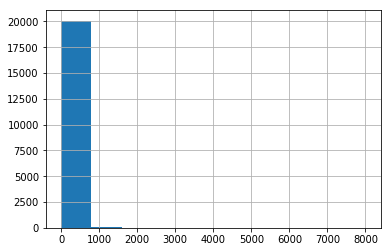

In [50]:
listings['price'].hist()

In [51]:
listings['price'].sort_values(ascending=False).head(20)

id
258273      8000.0
19686192    5000.0
5587500     4500.0
25349319    3900.0
15626614    3142.0
11040717    2500.0
19559616    2500.0
16344025    1600.0
17377934    1500.0
18350012    1254.0
23136800    1250.0
15118725    1200.0
15304003    1190.0
5611174     1119.0
14144923    1100.0
4394074     1095.0
24112912    1050.0
24754201    1025.0
6423150     1000.0
3286293     1000.0
Name: price, dtype: float64

There are outliers, I decided to delete listings with prices above 1000 dollars (not even 0.1 percent of the complete data)

In [52]:
listings=listings[listings['price']<=1000]

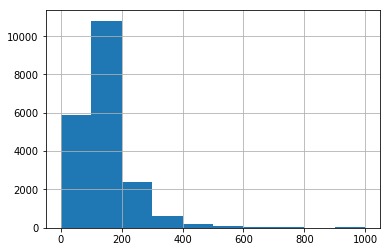

In [53]:
listings['price'].hist()

Since the distribution of the price variable is not normal and is highly right-skewed, I took its natural logarithm.. To similar distributions this is a common practice to prepare for analysis and it can be interpreted as percentual change. 

In [54]:
listings['price'].describe()

count    20096.000000
mean       145.830613
std         87.046500
min          0.000000
25%         95.000000
50%        125.000000
75%        173.000000
max       1000.000000
Name: price, dtype: float64

In [55]:
prices=listings['price']

In [56]:
prices.sort_values().head()

id
21423332    0.0
20597844    0.0
20644162    8.0
18188256    9.0
27127838    9.0
Name: price, dtype: float64

In [57]:
listings = listings[listings.price != 0]

In [58]:
listings['price_log']=np.log(listings.price)

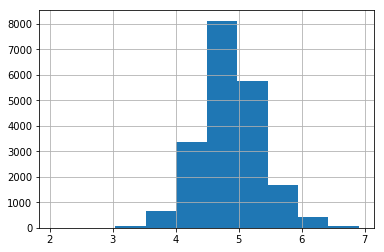

In [59]:
listings['price_log'].hist()

## Creating dummies

At this part I only recoded those variables to dummy that had 2 unique values (t and f)

In [60]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20094 entries, 2818 to 27565537
Data columns (total 80 columns):
last_scraped                        20094 non-null object
summary                             19571 non-null object
space                               14726 non-null object
description                         19986 non-null object
experiences_offered                 20094 non-null object
neighborhood_overview               13363 non-null object
transit                             13494 non-null object
access                              12460 non-null object
interaction                         12126 non-null object
house_rules                         12524 non-null object
host_name                           20089 non-null object
host_since                          20089 non-null float64
host_location                       20045 non-null object
host_about                          11960 non-null object
host_response_time                  13078 non-null object
host_response_

In [61]:
object_vars=listings.select_dtypes(include='object').columns

In [62]:
object_vars

Index(['last_scraped', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'transit', 'access',
       'interaction', 'house_rules', 'host_name', 'host_location',
       'host_about', 'host_response_time', 'host_is_superhost',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'has_availability', 'calendar_last_scraped',
       'requires_license', 'jurisdiction_names', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [63]:
listings[object_vars].head(2)

,last_scraped,summary,space,description,experiences_offered,neighborhood_overview,transit,access,interaction,house_rules,...,amenities,has_availability,calendar_last_scraped,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,
2818,2018-08-07,Quiet Garden View Room & Super Fast WiFi (up t...,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi (up t...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,...,"{Internet,Wifi,""Paid parking off premises"",""Bu...",t,2018-08-07,f,{Amsterdam},t,f,strict_14_with_grace_period,f,f
3209,2018-08-07,You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,"From Central Station, walk towards the busstop...",You will have the entire house to yourself.,We will meet you in person for check in whenev...,"Our house comes with our very sweet, but old (...",...,"{Internet,Wifi,Kitchen,""Paid parking off premi...",t,2018-08-07,f,{Amsterdam},f,f,moderate,f,f


Checking the number of unique values for each object variable

In [64]:
obj_variable_value_counts = []
for i in object_vars:
    obj_variable_value_counts.append([i, listings[i].value_counts().shape[0]])
    print (i) 
    print(listings[i].value_counts().shape)
    

last_scraped
(1,)
summary
(18865,)
space
(14265,)
description
(19636,)
experiences_offered
(1,)
neighborhood_overview
(11901,)
transit
(12896,)
access
(9649,)
interaction
(9625,)
house_rules
(10778,)
host_name
(5862,)
host_location
(539,)
host_about
(9456,)
host_response_time
(4,)
host_is_superhost
(2,)
host_verifications
(329,)
host_has_profile_pic
(2,)
host_identity_verified
(2,)
street
(112,)
neighbourhood_cleansed
(22,)
city
(34,)
state
(61,)
zipcode
(6768,)
market
(4,)
smart_location
(35,)
country_code
(1,)
country
(1,)
is_location_exact
(2,)
property_type
(32,)
room_type
(3,)
bed_type
(5,)
amenities
(18817,)
has_availability
(1,)
calendar_last_scraped
(1,)
requires_license
(1,)
jurisdiction_names
(1,)
instant_bookable
(2,)
is_business_travel_ready
(1,)
cancellation_policy
(5,)
require_guest_profile_picture
(2,)
require_guest_phone_verification
(2,)


In the next following lines I deleted other location variables as 'state', 'smart_locarion' and 'city' because they had large cardinality and most cases belonged to a single category.

In [65]:
listings['state'].value_counts()
listings=listings.drop(['state'], axis=1)

In [66]:
listings['smart_location'].value_counts()

Amsterdam, Netherlands                       19761
Amsterdam-Zuidoost, Netherlands                203
Amsterdam Zuid-Oost, Netherlands                39
Diemen, Netherlands                             12
Amstelveen, Netherlands                         10
Amsterdam , Netherlands                         10
De Pijp, Netherlands                             7
Watergraafsmeer, Netherlands                     6
Duivendrecht, Netherlands                        5
Jordaan, Netherlands                             5
Amsterdam (Zunderdorp), Netherlands              3
Amsterdam Zuidoost, Netherlands                  3
Zandvoort, Netherlands                           3
Zeeburg, Netherlands                             2
NL, Netherlands                                  2
Ámsterdam, Netherlands                           2
Broek in Waterland, Netherlands                  2
Amsterdam, Noord-Holland, NL, Netherlands        2
Амстердам, Netherlands                           1
Jordaan, Amsterdam, Netherlands

In [67]:
listings['city'].value_counts()


Amsterdam                       19761
Amsterdam-Zuidoost                203
Amsterdam Zuid-Oost                39
Diemen                             12
Amsterdam                          10
Amstelveen                         10
De Pijp                             7
Watergraafsmeer                     6
Jordaan                             5
Duivendrecht                        5
Zandvoort                           3
Amsterdam (Zunderdorp)              3
Amsterdam Zuidoost                  3
Amsterdam, Noord-Holland, NL        2
Broek in Waterland                  2
Zeeburg                             2
Ámsterdam                           2
Centrem                             1
Nederland                           1
Geuzenveld/Slotermeer               1
Badhoevedorp                        1
Government of Amsterdam             1
Zwanenburg                          1
Ouderkerk aan de Amstel             1
1015 SN Amsterdam                   1
Weesp                               1
Haarlem     

In [68]:
listings=listings.drop(['city'], axis=1)

In [69]:
listings=listings.drop(['smart_location'], axis=1)

In [70]:
listings['neighbourhood_cleansed'].value_counts()

De Baarsjes - Oud-West                    3524
De Pijp - Rivierenbuurt                   2503
Centrum-West                              2316
Centrum-Oost                              1716
Westerpark                                1505
Zuid                                      1462
Oud-Oost                                  1276
Bos en Lommer                             1132
Oostelijk Havengebied - Indische Buurt     974
Watergraafsmeer                            574
Oud-Noord                                  572
IJburg - Zeeburgereiland                   481
Slotervaart                                391
Noord-West                                 320
Noord-Oost                                 263
Buitenveldert - Zuidas                     252
Geuzenveld - Slotermeer                    219
Osdorp                                     154
De Aker - Nieuw Sloten                     140
Gaasperdam - Driemond                      115
Bijlmer-Centrum                            108
Bijlmer-Oost 

In [71]:
listings['property_type'].value_counts()

Apartment                 15747
House                      1598
Townhouse                   654
Boat                        406
Bed and breakfast           405
Loft                        372
Condominium                 303
Houseboat                   187
Guest suite                 145
Other                        57
Serviced apartment           41
Guesthouse                   34
Villa                        31
Boutique hotel               26
Cabin                        16
Bungalow                     16
Cottage                      14
Hostel                        9
Tiny house                    5
Hotel                         5
Chalet                        5
Barn                          4
Camper/RV                     4
Tent                          2
Lighthouse                    1
Yurt                          1
Castle                        1
Casa particular (Cuba)        1
Campsite                      1
Earth house                   1
Windmill                      1
Aparthot

If a variable has only 1 value, it should be discarded from the dataset. If it has two values, it should be converted to boolean.

In [72]:
for i in obj_variable_value_counts:
    if i[1]==1: 
        listings=listings.drop(i[0], axis=1)
    if i[1]==2:
        listings[i[0]]=(listings[i[0]]=='t').astype(bool)
 

In [73]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20094 entries, 2818 to 27565537
Data columns (total 68 columns):
summary                             19571 non-null object
space                               14726 non-null object
description                         19986 non-null object
neighborhood_overview               13363 non-null object
transit                             13494 non-null object
access                              12460 non-null object
interaction                         12126 non-null object
house_rules                         12524 non-null object
host_name                           20089 non-null object
host_since                          20089 non-null float64
host_location                       20045 non-null object
host_about                          11960 non-null object
host_response_time                  13078 non-null object
host_response_rate                  13078 non-null float64
host_is_superhost                   20094 non-null bool
host_listings_c

Each verification type from 'host_verifications' needs to be converted to its own dummy variable.

In [74]:
listings['host_verifications'].head()

id
2818              ['email', 'phone', 'reviews']
3209     ['email', 'phone', 'reviews', 'jumio']
20168             ['email', 'phone', 'reviews']
25428             ['email', 'phone', 'reviews']
27886    ['email', 'phone', 'reviews', 'jumio']
Name: host_verifications, dtype: object

In [75]:
listings['host_verifications'] = listings['host_verifications'].apply(eval)

In [76]:
listings_host_ver=pd.get_dummies(listings['host_verifications'].apply(pd.Series).stack()).sum(level=0)

Add prefix to columns to make them easily distinguishable later.

In [77]:
listings_host_ver.columns = ["host_verifications_" + c for c in listings_host_ver.columns]

In [78]:
listings=pd.concat([listings,listings_host_ver], axis=1)

In [79]:
listings=listings.drop('host_verifications', axis=1)

In [80]:
listings.head(2)

,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_name,host_since,...,host_verifications_offline_government_id,host_verifications_phone,host_verifications_reviews,host_verifications_selfie,host_verifications_sent_id,host_verifications_sesame,host_verifications_sesame_offline,host_verifications_weibo,host_verifications_work_email,host_verifications_zhima_selfie
id,,,,,,,,,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi (up t...,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi (up t...,"Indische Buurt (""Indies Neighborhood"") is a ne...",The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,Daniel,3604.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3209,You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,Welcome to the Spaarndammerbuurt! From the beg...,"From Central Station, walk towards the busstop...",You will have the entire house to yourself.,We will meet you in person for check in whenev...,"Our house comes with our very sweet, but old (...",Maartje,3574.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Checking some variables with only a few values

In [81]:
price_policy = listings[['price','cancellation_policy']].groupby('cancellation_policy').mean()
price_policy.head()

,price
cancellation_policy,
flexible,134.046160
moderate,137.162855
strict_14_with_grace_period,159.897925
super_strict_30,80.333333
super_strict_60,453.878788


In [82]:
room_type= listings[['price','room_type']].groupby('room_type').mean()
room_type.head()


,price
room_type,
Entire home/apt,158.224831
Private room,97.392733
Shared room,90.500000


In [83]:
bed_type= listings[['price','bed_type']].groupby('bed_type').mean()
bed_type.head()


,price
bed_type,
Airbed,116.312500
Couch,87.000000
Futon,94.116279
Pull-out Sofa,92.972603
Real Bed,146.386763


In [84]:
host_response_time= listings[['price','host_response_time']].groupby('host_response_time').mean()
host_response_time.head()

,price
host_response_time,
a few days or more,159.350820
within a day,158.243086
within a few hours,157.035827
within an hour,144.249598


In [85]:
market= listings[['price','market']].groupby('market').mean()
market.head()


,price
market,
Amsterdam,145.88626
Barcelona,98.00000
Other (International),116.00000
Vilnius,96.00000


### Getting 'rid' of the variables with too many unique values

In [86]:
object_vars=listings.select_dtypes(include='object').columns
obj_variable_value_counts = []
for i in object_vars:
    print (i) 
    obj_variable_value_counts.append([i, listings[i].value_counts().shape[0]])

    print(listings[i].value_counts().shape)

summary
(18865,)
space
(14265,)
description
(19636,)
neighborhood_overview
(11901,)
transit
(12896,)
access
(9649,)
interaction
(9625,)
house_rules
(10778,)
host_name
(5862,)
host_location
(539,)
host_about
(9456,)
host_response_time
(4,)
street
(112,)
neighbourhood_cleansed
(22,)
zipcode
(6768,)
market
(4,)
property_type
(32,)
room_type
(3,)
bed_type
(5,)
amenities
(18817,)
cancellation_policy
(5,)


### Building up another df for regression and corr matrix without the texts

In [87]:
listings_clean=listings.copy()
for i in obj_variable_value_counts:
    if i[1]>100: 
        listings_clean=listings_clean.drop(i[0], axis=1)

In [88]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20094 entries, 2818 to 27565537
Data columns (total 72 columns):
host_since                                  20089 non-null float64
host_response_time                          13078 non-null object
host_response_rate                          13078 non-null float64
host_is_superhost                           20094 non-null bool
host_listings_count                         20089 non-null float64
host_total_listings_count                   20089 non-null float64
host_has_profile_pic                        20094 non-null bool
host_identity_verified                      20094 non-null bool
neighbourhood_cleansed                      20094 non-null object
market                                      20048 non-null object
latitude                                    20094 non-null float64
longitude                                   20094 non-null float64
is_location_exact                           20094 non-null bool
property_type                

Discarding the geographic variables since it is out of scope for this analysis. It could be however an important future direction.

In [89]:
listings_clean=listings_clean.drop(['longitude','latitude'], axis=1)

# Correlation Matrix

Using spearmanr correlation because that doesn't assume linear relationship

In [90]:
from scipy.stats import spearmanr

Getting dummies from objects for correlation. 

Since we cannot include all dummies in the regression (would cause perfect multicollinearity), a category will be removed to be considered as a reference category, pd.get_dummies usually gets the first in the alphabetic order. I want to remove the most common category instead, therefore I rename the most common category to be first in the alphabetic order.

In [91]:
object_vars=listings_clean.select_dtypes(include=['object']).columns

In [92]:
for i in object_vars:
    v_counts_df= listings_clean[i].value_counts()
    print(v_counts_df)
    listings_clean[i][listings_clean[i]==v_counts_df.index[0]]='00'+v_counts_df.index[0]

within an hour        6843
within a few hours    3182
within a day          2748
a few days or more     305
Name: host_response_time, dtype: int64
De Baarsjes - Oud-West                    3524
De Pijp - Rivierenbuurt                   2503
Centrum-West                              2316
Centrum-Oost                              1716
Westerpark                                1505
Zuid                                      1462
Oud-Oost                                  1276
Bos en Lommer                             1132
Oostelijk Havengebied - Indische Buurt     974
Watergraafsmeer                            574
Oud-Noord                                  572
IJburg - Zeeburgereiland                   481
Slotervaart                                391
Noord-West                                 320
Noord-Oost                                 263
Buitenveldert - Zuidas                     252
Geuzenveld - Slotermeer                    219
Osdorp                                     154
De Aker

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Amsterdam                20037
Other (International)        9
Barcelona                    1
Vilnius                      1
Name: market, dtype: int64
Apartment                 15747
House                      1598
Townhouse                   654
Boat                        406
Bed and breakfast           405
Loft                        372
Condominium                 303
Houseboat                   187
Guest suite                 145
Other                        57
Serviced apartment           41
Guesthouse                   34
Villa                        31
Boutique hotel               26
Cabin                        16
Bungalow                     16
Cottage                      14
Hostel                        9
Tiny house                    5
Hotel                         5
Chalet                        5
Barn                          4
Camper/RV                     4
Tent                          2
Lighthouse                    1
Yurt                          1
Castle           

In [93]:
listings_clean[object_vars].head()

,host_response_time,neighbourhood_cleansed,market,property_type,room_type,bed_type,cancellation_policy
id,,,,,,,
2818,00within an hour,Oostelijk Havengebied - Indische Buurt,00Amsterdam,00Apartment,Private room,00Real Bed,00strict_14_with_grace_period
3209,00within an hour,Westerpark,00Amsterdam,00Apartment,00Entire home/apt,00Real Bed,moderate
20168,within a few hours,Centrum-Oost,00Amsterdam,Townhouse,Private room,00Real Bed,00strict_14_with_grace_period
25428,within a few hours,Centrum-West,00Amsterdam,00Apartment,00Entire home/apt,00Real Bed,00strict_14_with_grace_period
27886,00within an hour,Centrum-West,00Amsterdam,00Apartment,Private room,00Real Bed,00strict_14_with_grace_period


In [94]:
listings_clean = pd.get_dummies(listings_clean, drop_first=True)

In [95]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20094 entries, 2818 to 27565537
Columns: 131 entries, host_since to cancellation_policy_super_strict_60
dtypes: bool(9), float64(44), int64(10), uint8(68)
memory usage: 9.9 MB


In [96]:
uint_vars_clean=listings_clean.select_dtypes(include='uint8').columns

In [97]:
for col in uint_vars_clean:
    listings_clean[col]= listings_clean[col].astype('bool')

Some more data checking and cleaning steps to prepare for the correlation matrix

In [98]:
max_values=listings_clean.max(axis=0)

In [99]:
max_values.sort_values(ascending=False).head(3)

maximum_nights      99999.0
security_deposit     4736.0
host_since           3604.0
dtype: float64

In [100]:
listings_clean['price_log'].describe()

count    20094.000000
mean         4.856236
std          0.485124
min          2.079442
25%          4.553877
50%          4.828314
75%          5.153292
max          6.907755
Name: price_log, dtype: float64

In [101]:
corr, p_value = spearmanr(listings_clean.astype('float').as_matrix())

In [102]:
corr

array([[ 1.00000000e+00, -2.97733368e-02,  6.14063988e-02, ...,
        -2.23138608e-02, -1.01117358e-03, -1.36366408e-02],
       [-2.97733368e-02,  1.00000000e+00, -1.29967640e-01, ...,
         2.77580935e-02, -2.12057818e-02, -4.38794066e-02],
       [ 6.14063988e-02, -1.29967640e-01,  1.00000000e+00, ...,
         3.80960285e-02, -5.22901701e-03, -1.73556501e-02],
       ...,
       [-2.23138608e-02,  2.77580935e-02,  3.80960285e-02, ...,
         1.00000000e+00, -9.49524362e-03, -3.15156989e-02],
       [-1.01117358e-03, -2.12057818e-02, -5.22901701e-03, ...,
        -9.49524362e-03,  1.00000000e+00, -4.95610537e-04],
       [-1.36366408e-02, -4.38794066e-02, -1.73556501e-02, ...,
        -3.15156989e-02, -4.95610537e-04,  1.00000000e+00]])

In [103]:
p_value

array([[0.00000000e+00, 2.43067637e-05, 2.97926530e-18, ...,
        1.56012607e-03, 8.86030892e-01, 5.32351450e-02],
       [2.43067637e-05, 0.00000000e+00, 2.03764104e-76, ...,
        8.30876506e-05, 2.64586541e-03, 4.88792701e-10],
       [2.97926530e-18, 2.03764104e-76, 0.00000000e+00, ...,
        6.59523701e-08, 4.58578605e-01, 1.38839094e-02],
       ...,
       [1.56012607e-03, 8.30876506e-05, 6.59523701e-08, ...,
        0.00000000e+00, 1.78325484e-01, 7.88486689e-06],
       [8.86030892e-01, 2.64586541e-03, 4.58578605e-01, ...,
        1.78325484e-01, 0.00000000e+00, 9.43994625e-01],
       [5.32351450e-02, 4.88792701e-10, 1.38839094e-02, ...,
        7.88486689e-06, 9.43994625e-01, 0.00000000e+00]])

Creating df's in order to check for the values

In [104]:
corr_df = pd.DataFrame(corr, columns=listings_clean.columns, index=listings_clean.columns)
corr_df.head()

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
host_since,1.000000,-0.029773,0.061406,-0.015902,-0.015902,0.015384,0.388331,0.002975,-0.000201,0.015504,...,-0.057184,-0.000456,0.009342,0.008155,0.013314,0.015415,-0.081919,-0.022314,-0.001011,-0.013637
host_response_rate,-0.029773,1.000000,-0.129968,-0.276182,-0.276182,-0.007679,-0.004558,-0.024542,-0.052197,-0.018416,...,-0.082354,0.003676,0.008169,-0.009613,0.000900,0.006790,0.116521,0.027758,-0.021206,-0.043879
host_is_superhost,0.061406,-0.129968,1.000000,0.055251,0.055251,0.013640,0.070611,-0.002546,-0.034575,0.003047,...,0.151751,-0.002211,-0.012080,0.000568,0.009959,0.023335,-0.089660,0.038096,-0.005229,-0.017356
host_listings_count,-0.015902,-0.276182,0.055251,1.000000,1.000000,-0.004991,0.007528,0.013931,0.008589,0.039756,...,0.210289,0.022330,0.003957,0.003020,-0.002156,-0.002376,-0.065135,-0.044347,0.026488,0.089806
host_total_listings_count,-0.015902,-0.276182,0.055251,1.000000,1.000000,-0.004991,0.007528,0.013931,0.008589,0.039756,...,0.210289,0.022330,0.003957,0.003020,-0.002156,-0.002376,-0.065135,-0.044347,0.026488,0.089806


In [105]:
p_df = pd.DataFrame(p_value, columns=listings_clean.columns, index=listings_clean.columns)
p_df.head()

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
host_since,0.000000e+00,2.430676e-05,2.979265e-18,2.418561e-02,2.418561e-02,0.029201,0.000000e+00,0.673263,9.772417e-01,2.796624e-02,...,4.973871e-16,0.948487,0.185455,0.247693,0.059133,0.028877,2.861918e-31,1.560126e-03,0.886031,5.323515e-02
host_response_rate,2.430676e-05,0.000000e+00,2.037641e-76,0.000000e+00,0.000000e+00,0.276384,5.182258e-01,0.000503,1.325232e-13,9.037483e-03,...,1.382565e-31,0.602298,0.246873,0.172999,0.898514,0.335791,1.098789e-61,8.308765e-05,0.002646,4.887927e-10
host_is_superhost,2.979265e-18,2.037641e-76,0.000000e+00,4.596128e-15,4.596128e-15,0.053184,1.228779e-23,0.718193,9.475988e-07,6.657812e-01,...,8.354605e-104,0.753974,0.086840,0.935793,0.158033,0.000940,3.801615e-37,6.595237e-08,0.458579,1.388391e-02
host_listings_count,2.418561e-02,0.000000e+00,4.596128e-15,0.000000e+00,0.000000e+00,0.479329,2.859408e-01,0.048299,2.234372e-01,1.725865e-08,...,1.250984e-199,0.001548,0.574841,0.668576,0.759863,0.736303,2.412018e-20,3.194848e-10,0.000173,2.913488e-37
host_total_listings_count,2.418561e-02,0.000000e+00,4.596128e-15,0.000000e+00,0.000000e+00,0.479329,2.859408e-01,0.048299,2.234372e-01,1.725865e-08,...,1.250984e-199,0.001548,0.574841,0.668576,0.759863,0.736303,2.412018e-20,3.194848e-10,0.000173,2.913488e-37


Long format makes it easier to filter for values

In [106]:
pd_corr_long = corr_df.stack().reset_index()

In [107]:
pd_corr_long.head()

,level_0,level_1,0
0,host_since,host_since,1.000000
1,host_since,host_response_rate,-0.029773
2,host_since,host_is_superhost,0.061406
3,host_since,host_listings_count,-0.015902
4,host_since,host_total_listings_count,-0.015902


In [108]:
pd_corr_long.sort_values(by=0, ascending=False).head()

,level_0,level_1,0
0,host_since,host_since,1.0
3564,review_scores_rating,review_scores_rating,1.0
3828,review_scores_cleanliness,review_scores_cleanliness,1.0
3960,review_scores_checkin,review_scores_checkin,1.0
4092,review_scores_communication,review_scores_communication,1.0


Checking only the high values.

In [109]:
pd_corr_long = pd_corr_long[abs(pd_corr_long[0])>0.7]

Removing self correlation.

In [110]:
pd_corr_long = pd_corr_long[pd_corr_long["level_0"]!=pd_corr_long["level_1"]]

In [111]:
pd_corr_long.head()

,level_0,level_1,0
397,host_listings_count,host_total_listings_count,1.000000
430,host_listings_count,calculated_host_listings_count,0.927687
527,host_total_listings_count,host_listings_count,1.000000
561,host_total_listings_count,calculated_host_listings_count,0.927687
1058,accommodates,bedrooms,0.734320


In [112]:
pd_p_long = p_df.stack().reset_index()

### Correlation matrix allows us to get rid of the intercorrelated variables that are still in the dataset

Checking for p value in case of highly correlated pairs 

Merge the p values to our highly correlated variable pairs because we are only interested in those variable pairs that are significantly correlated.

In [113]:
pd_corr_p_long=pd_corr_long.merge(pd_p_long, how='left', on=['level_0','level_1'], left_index=False, right_index=False, sort=False, suffixes=('', '_p'))

In [114]:
pd_corr_p_long[0:10]

,level_0,level_1,0,0_p
0,host_listings_count,host_total_listings_count,1.000000,0.0
1,host_listings_count,calculated_host_listings_count,0.927687,0.0
2,host_total_listings_count,host_listings_count,1.000000,0.0
3,host_total_listings_count,calculated_host_listings_count,0.927687,0.0
4,accommodates,bedrooms,0.734320,0.0
5,accommodates,beds,0.840714,0.0
6,bedrooms,accommodates,0.734320,0.0
7,bedrooms,beds,0.748251,0.0
8,beds,accommodates,0.840714,0.0
9,beds,bedrooms,0.748251,0.0


Deleting the highly and significantly intercorrelated variables. Let's try to leave in those variables that are easier to interpret.

In [115]:
correlated_vars = pd_corr_p_long['level_0'].unique()

In [116]:
correlated_to_drop=set(correlated_vars)-set(['host_listings_count','beds','price_log','availability_30','reviews_per_month','require_guest_phone_verification','host_verifications_sent_id'])

In [117]:
listings_clean=listings_clean.drop(correlated_to_drop, axis=1)

In [118]:
listings_clean.describe()

,host_since,host_response_rate,host_listings_count,bathrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,...,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_jumio,host_verifications_manual_offline,host_verifications_manual_online,host_verifications_phone,host_verifications_reviews,host_verifications_sent_id,host_verifications_work_email
count,20089.000000,13078.000000,20089.000000,20085.000000,20088.000000,13791.000000,16476.000000,20094.000000,20094.000000,20094.000000,...,20020.000000,20020.000000,20020.000000,20020.000000,20020.000000,20020.000000,20020.000000,20020.000000,20020.000000,20020.000000
mean,1333.185972,94.886986,6.185375,1.128877,1.855486,218.808208,38.869750,1.464865,11.221210,3.248134,...,0.933017,0.246154,0.056693,0.594306,0.022028,0.005794,0.974126,0.882617,0.000749,0.124326
std,648.567251,15.195126,25.139764,0.363802,1.378805,307.346024,22.876275,0.915390,22.034568,12.164794,...,0.249999,0.430780,0.231261,0.491038,0.146778,0.075901,0.158764,0.321884,0.027363,0.329961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,841.000000,100.000000,1.000000,1.000000,1.000000,95.000000,25.000000,1.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1362.000000,100.000000,1.000000,1.000000,1.000000,150.000000,36.000000,1.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1826.000000,100.000000,1.000000,1.000000,2.000000,250.000000,50.000000,2.000000,20.000000,3.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,3604.000000,100.000000,629.000000,15.000000,32.000000,4736.000000,531.000000,16.000000,280.000000,1001.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Regression

In order to be able to build up a price model (on non time series data) I turn to linear regression analysis. This is not only the most widely used method for similar use cases, but also easy to interpret and present. I also tested the used OLS Regression against a Decision Tree model. The Regression model performed a bit worse but comparable to the Decision Tree. For interpretability, I went with visualizing the Regression's results.

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

Statsmodel is a python library that supports a large number of models, similarly to STATA. The output of Statsmodel is easy to interpret.

In [120]:
import statsmodels.api as sm

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [121]:
listings_clean.count().sort_values()

host_response_rate                                               13078
security_deposit                                                 13791
cleaning_fee                                                     16476
review_scores_location                                           17360
first_review                                                     17656
first_review_month                                               17656
reviews_per_month                                                17656
last_review_month                                                17658
calendar_updated                                                 18349
host_verifications_phone                                         20020
host_verifications_reviews                                       20020
host_verifications_manual_offline                                20020
host_verifications_google                                        20020
host_verifications_facebook                                      20020
host_v

'host_since' and other vars will not be significant or have a real effect in the regression later on. Since these variables have a lot of missing values too and are narrowing the dataset I drop them here

In [122]:
listings_clean=listings_clean.drop(['host_since','host_response_rate','security_deposit','calendar_updated','cleaning_fee'], axis=1)

In [123]:
listings_clean=listings_clean.dropna()

In [124]:
listings_clean.shape

(17311, 101)

In [125]:
target = ['price_log']

In [126]:
y=listings_clean[target]

In [127]:
X= listings_clean.drop(target,  axis=1)

Making sure that the intercept or constant is included.

In [128]:
X = sm.add_constant(X)

## To test the model, we create training and testing set

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [130]:
model = sm.OLS(y_train, X_train.astype(float), missing="drop").fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     128.5
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:26:20   Log-Likelihood:                -3467.9
No. Observations:               11598   AIC:                             7130.
Df Residuals:                   11501   BIC:                             7844.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [131]:
y_prediction = model.predict(X_test)
y_prediction.head()

id
2485539     5.32469
21738474    4.62681
19400778    4.86677
20689222    4.60093
2727573     4.80158
dtype: object

### Testing the model's accuracy
Transforming the log pricing variable back to normal

In [132]:
RMSE = sqrt(mean_squared_error(y_true = np.exp(y_test["price_log"]), y_pred = np.exp(y_prediction.astype(float))))

In [133]:
RMSE

88.74690652098397

# Decision tree

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
tree_model = DecisionTreeRegressor(max_leaf_nodes=20, random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [136]:
y_prediction = tree_model.predict(X_test)
y_prediction

array([5.04771132, 4.66305897, 5.04771132, ..., 5.30958728, 5.04576154,
       4.66305897])

In [137]:
RMSE = sqrt(mean_squared_error(y_true = np.exp(y_test["price_log"]), y_pred = np.exp(y_prediction.astype(float))))
RMSE

68.17215701905937

OLS Regression seems to perform a worse than the Decision Tree, although I chose to go with the Regression for interpretability.

### Visualization of the OLS results

In [138]:
model.params.head()

const                     4.061039
host_is_superhost         0.067568
host_listings_count      -0.001389
host_has_profile_pic      0.198363
host_identity_verified    0.006924
dtype: float64

In [139]:
model.pvalues.head()

const                     0.000000e+00
host_is_superhost         8.341848e-15
host_listings_count       1.189281e-20
host_has_profile_pic      2.957517e-02
host_identity_verified    3.949766e-01
dtype: float64

In [140]:
model.conf_int(0.05).head()

,0,1
const,3.856063,4.266015
host_is_superhost,0.050528,0.084608
host_listings_count,-0.001681,-0.001098
host_has_profile_pic,0.019675,0.377050
host_identity_verified,-0.009031,0.022879


In [141]:
model_data= pd.concat([model.params,model.conf_int(0.05),model.pvalues], axis=1)

In [142]:
model_data.columns=['parameter','conf_int0','conf_int1','p_value']

In [143]:
model_data["parameter"] = model_data["parameter"] * 100
model_data["conf_int0"] = model_data["conf_int0"] * 100
model_data["conf_int1"] = model_data["conf_int1"] * 100

Filter for the significant variables

In [144]:
model_data= model_data[model_data['p_value']<0.05]

For visualization purposes, I took only the parameters that had an effect higher than 0.03

In [145]:
model_data= model_data[abs(model_data['parameter'])>0.03]

Delete the constant from the visualization

In [146]:
model_data=model_data.drop('const')

In [147]:
model_data['colors']="darkmagenta"
model_data['colors'][model_data.index.str.contains('neighbourhood')] = "chartreuse"
model_data['colors'][model_data.index.str.contains('property')] = "seagreen"
model_data['colors'][model_data.index.str.contains('cancellation')] = "lightseagreen"

model_data.colors.value_counts()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


darkmagenta      24
chartreuse       20
seagreen         11
lightseagreen     2
Name: colors, dtype: int64

In [148]:
model_data.index=model_data.index.str.replace('cleansed_','')

The following figure demonstrates not only the effect of different independent variables but also the confidence interval

Text(0.5,1,'Factors affecting the Price')

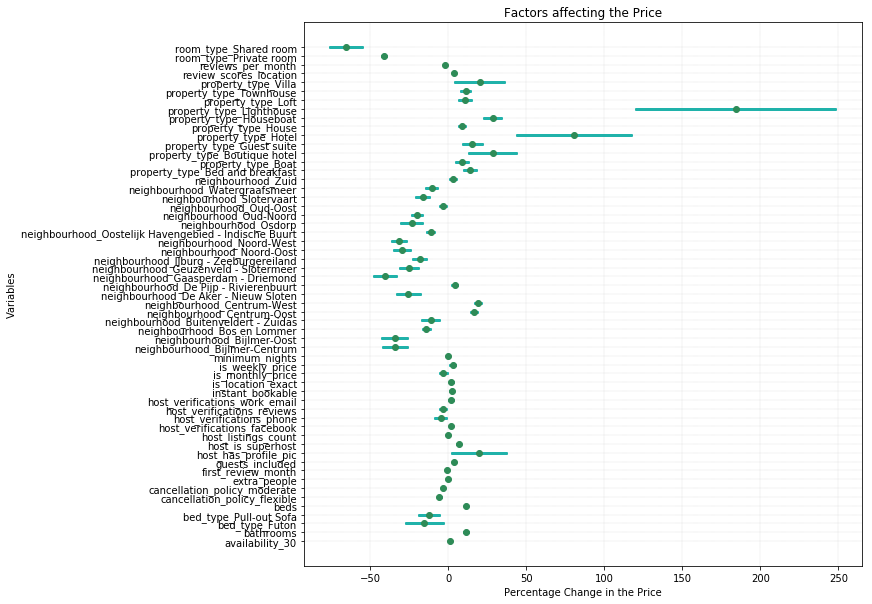

In [149]:
plt.figure(figsize=(10,10))
plt.grid(True, which='major', axis='both', linestyle='--', linewidth=0.2)
plt.errorbar(model_data['parameter'], model_data.index,  xerr=model_data['conf_int1']-model_data['parameter'], fmt='o', color='seagreen',
                    ecolor='lightseagreen', elinewidth=3, capsize=1)
plt.ylabel("Variables")
plt.xlabel("Percentage Change in the Price")
plt.title('Factors affecting the Price')

Text(0.5,1,'Factors affecting the Price')

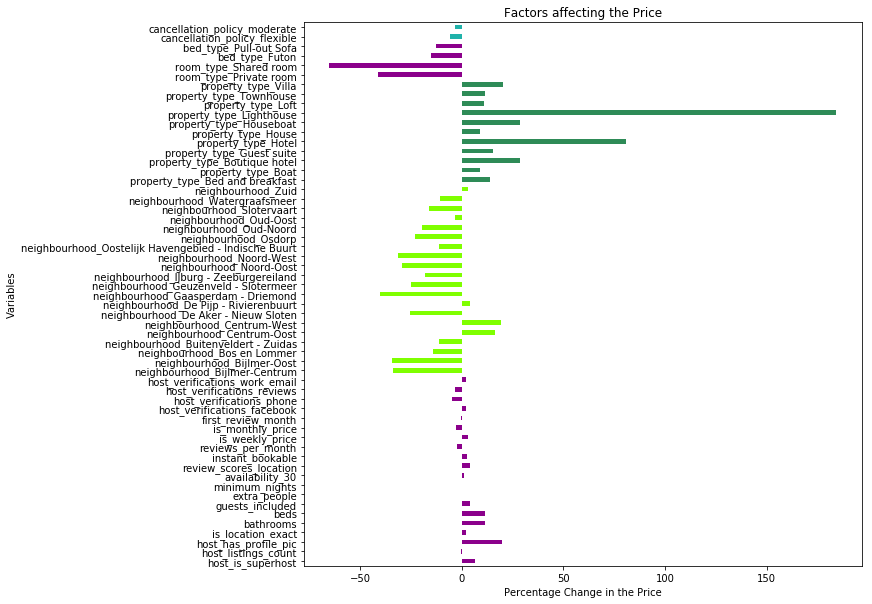

In [150]:
model_data["parameter"].plot(kind='barh', figsize=(10,10), color=model_data.colors.tolist())
plt.ylabel("Variables")
plt.xlabel("Percentage Change in the Price")
plt.title('Factors affecting the Price')

## How to interpret the results?
Coefficients mean that price will be raised by this many percentage when the Factor changes with one unit. 

For example: 
- In the case of numeric factors, if the number of beds increases with 1, the price increases with 10 percent.
- In the case of non-numeric or categorical variables, if the property type is lighthouse, the price increases with 180 percent compared to the reference category, which is always the most common type. The most common property type was Apartment.

## What do the results tell us?

I would highlight the following points to focus on:
- Neighbourhood is an important determining factor for the price. The more central a location is, the more it costs.
- Specialty property types (such as Lighthouse, Boat, Villa) tend to cost much more than normal Apartments.
- The price increases with the number of beds and bathrooms
- Beds that are not real beds, but couches or futons tend to drag down the prices
- If the host is verified and a superhost, that slightly increases the price

# Word cloud

In [157]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [158]:
from scipy.misc import imread

Reading the image that will serve as a mask for the word cloud.

In [160]:
travel_mask = imread('hotel-icon.jpg', flatten=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


Creating one word cloud for the whole dataset

In [162]:
text=listings['description'].dropna().tolist()

In [163]:
text=' '.join(text)

C:\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:721: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


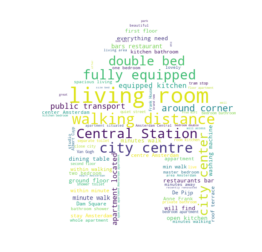

In [164]:
wordcloud = WordCloud(background_color="white", mask=travel_mask, max_font_size=50, max_words=80)
wordcloud.generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file('wordcloud_overall.png')

# Future Directions

From the whole analysis (regression and wordcloud), we can conclude that location is probably a very important driving factor for prices. 
- based on longitude and latitude we could measure the distance from thee center (for example by attaching travel time calculated using google maps API)

Due to the large amount of textual information additional features could be added to the model as a more sophisticated tool to to see customer's taste.
- build a document term matrix and use the most characteristic words in the regression (as center, equipped, beautiful, garden etc.)
- create a topic model to capture dominant topics

The specification of the regression could be improved
- include quadratic forms to account for non-linearity
- clean each independent variable through outlier detection
- more sophisticated machine learning models could be used as the Decision Tree above